In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('linear_data.csv')
df1.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [4]:
x_linear = df1[['x']]
y_linear = df1[['y']]

In [5]:
df2 = pd.read_csv('nonlinear_data.csv')
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [6]:
x_nonlinear = df2[['x']]
y_nonlinear = df2[['y']]

Visual Representaion

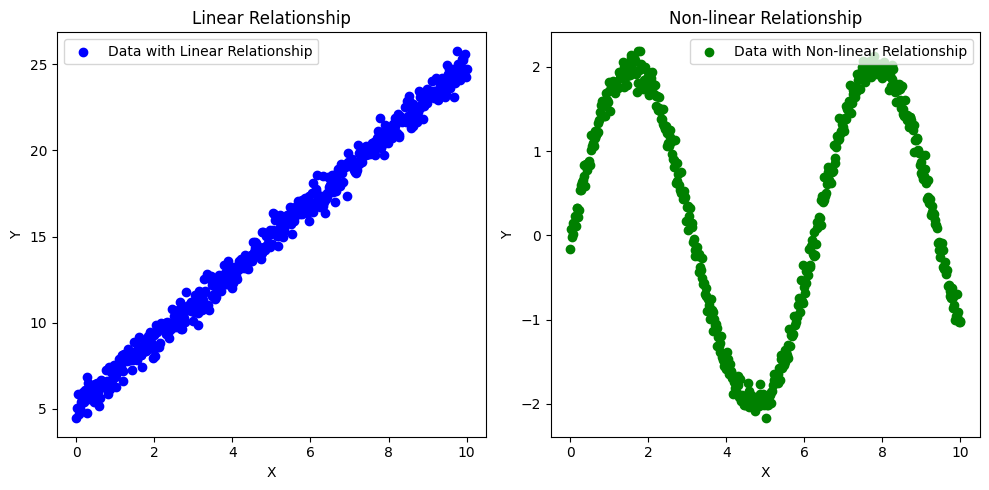

In [7]:
#Linear data
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x_linear,y_linear,color = 'blue',label = 'Data with Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship')
plt.legend()

#NonLinear
plt.subplot(1, 2, 2)
plt.scatter(x_nonlinear, y_nonlinear, color='green', label='Data with Non-linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
df1.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [9]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg1 = LinearRegression()

In [12]:
reg1.fit(x_linear,y_linear)

LinearRegression()

In [13]:
reg1.score(x_linear,y_linear)

0.9928923730526016

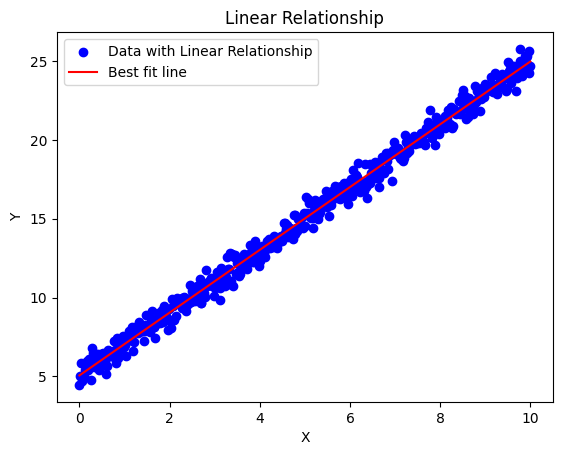

In [14]:
plt.scatter(x_linear, y_linear, color='blue', label='Data with Linear Relationship')
plt.plot(x_linear, reg1.predict(x_linear), color='red', label='Best fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship')
plt.legend()

NonLinear

In [15]:
reg2 =LinearRegression()

In [16]:
reg2.fit(x_nonlinear,y_nonlinear)

LinearRegression()

In [17]:
reg2.score(x_nonlinear,y_nonlinear)

0.004321199719043656

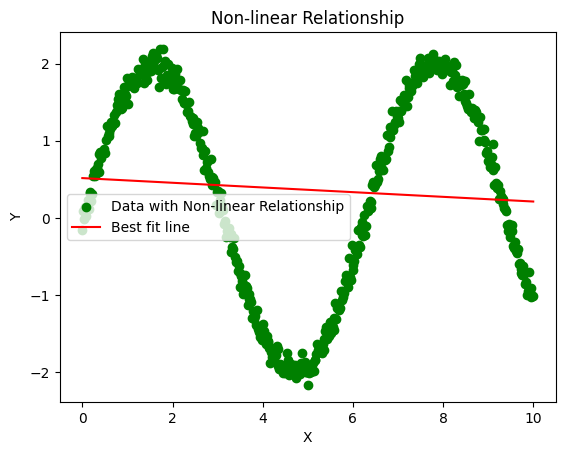

In [18]:
plt.scatter(x_nonlinear, y_nonlinear, color='green', label='Data with Non-linear Relationship')
plt.plot(x_nonlinear, reg2.predict(x_nonlinear), color='red', label='Best fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')
plt.legend()

Polynomial Regression

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
poly = PolynomialFeatures(degree=6)
x_poly = poly.fit_transform(x_nonlinear)

In [22]:
x_poly.shape

(500, 7)

In [23]:
reg_poly = LinearRegression()

In [24]:
reg_poly.fit(x_poly,y_nonlinear)

LinearRegression()

In [25]:
reg_poly.score(x_poly,y_nonlinear)

0.9930624844497353

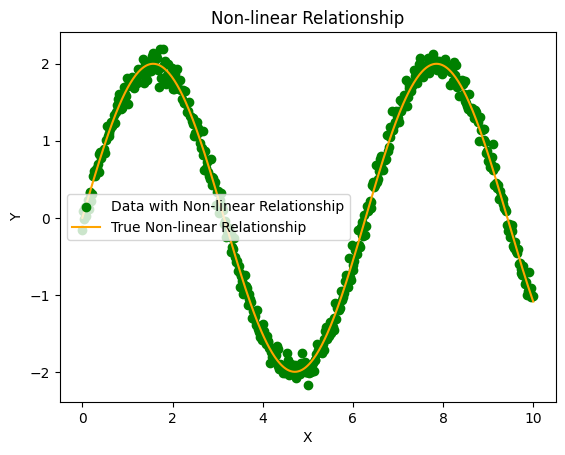

In [26]:
plt.scatter(x_nonlinear, y_nonlinear, color='green', label='Data with Non-linear Relationship')
plt.plot(x_nonlinear, 2 * np.sin(x_nonlinear), color='orange', label='True Non-linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')
plt.legend()

Separete Train test

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test ,y_train , y_test =train_test_split(x_poly,y_nonlinear , test_size=30, random_state=1)

In [28]:
reg = LinearRegression()

In [29]:
reg.fit(x_train,y_train)

LinearRegression()

Testing score

In [30]:
reg.score(x_test,y_test)

0.9895406823667404

Training score

In [31]:
reg.score(x_train,y_train)

0.9932157716838905